In [1]:
import numpy as np
#import scipy.interpolate as interp
import matplotlib.pyplot as plt
import lalsimulation as lal

/home/braun2/anaconda3/envs/tf/lib/python3.8/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [10]:
#l1 = np.loadtxt('lambda_1-50000.dat.txt', dtype=float)
#l2 = np.loadtxt('lambda_2-50000.dat.txt', dtype=float)
#m1 = np.loadtxt("mass_1_source-50000.dat.txt", dtype=float)
#m2 = np.loadtxt("mass_2_source-50000.dat.txt", dtype=float)

gamma0 = np.loadtxt("eos_polytrope_gamma_0-50000.dat.txt", dtype=float)
gamma1 = np.loadtxt("eos_polytrope_gamma_1-50000.dat.txt", dtype=float)
gamma2 = np.loadtxt("eos_polytrope_gamma_2-50000.dat.txt", dtype=float)
logp1_cgs = np.loadtxt("eos_polytrope_log_pressure_1-50000.dat.txt", dtype=float) # in cgs
logp2_cgs = np.loadtxt("eos_polytrope_log_pressure_2-50000.dat.txt", dtype=float) # in cgs

logp1_s = logp1_cgs - 1
logp2_s = logp2_cgs - 1

# this ends up excluding the last 20% of the data, but is more accurate to represent the MLA predictions because
# the predictions are based off on the first 80% of data.
#len = len(gamma0)
#length = int(len * .8)

length = 40000

Progress : 0 / 40000, 0.00%
Progress : 10 / 40000, 0.03%
Progress : 20 / 40000, 0.05%
Progress : 30 / 40000, 0.07%
Progress : 40 / 40000, 0.10%
Progress : 50 / 40000, 0.12%
Progress : 60 / 40000, 0.15%
Progress : 70 / 40000, 0.18%
Progress : 80 / 40000, 0.20%
Progress : 90 / 40000, 0.22%
Progress : 100 / 40000, 0.25%
Progress : 110 / 40000, 0.27%
Progress : 120 / 40000, 0.30%
Progress : 130 / 40000, 0.33%
Progress : 140 / 40000, 0.35%
Progress : 150 / 40000, 0.38%
Progress : 160 / 40000, 0.40%
Progress : 170 / 40000, 0.43%
Progress : 180 / 40000, 0.45%
Progress : 190 / 40000, 0.47%
Progress : 200 / 40000, 0.50%
Progress : 210 / 40000, 0.53%
Progress : 220 / 40000, 0.55%
Progress : 230 / 40000, 0.57%
Progress : 240 / 40000, 0.60%
Progress : 250 / 40000, 0.62%
Progress : 260 / 40000, 0.65%
Progress : 270 / 40000, 0.68%
Progress : 280 / 40000, 0.70%
Progress : 290 / 40000, 0.73%
Progress : 300 / 40000, 0.75%
Progress : 310 / 40000, 0.78%
Progress : 320 / 40000, 0.80%
Progress : 330 / 4000

GSL function failed: interpolation error (errnum=1)
XLAL Error - <GSL function> (interp.c:150): Generic failure


RuntimeError: Generic failure

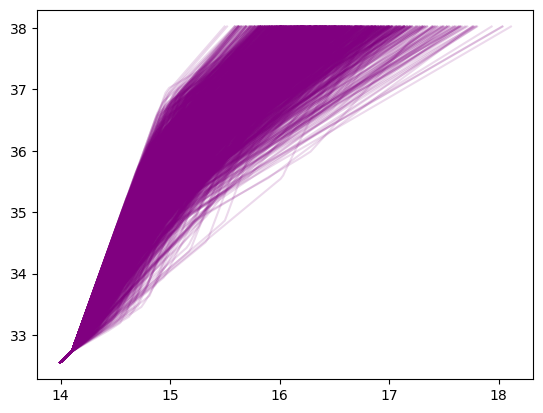

In [11]:
hlow_0 = 0.022460530117115313
hlow_1 = 0.024210313916473953
hlow = np.linspace(hlow_0,hlow_1,10,endpoint=False)
for i in range(length):

    g0 = float(gamma0[i])
    g1 = float(gamma1[i])
    g2 = float(gamma2[i])
    p1 = float(logp1_s[i])
    p2 = float(logp2_s[i])
    
    if i%4000==0:
        print('Progress : %d / %d, %0.2f%%'%(i,length,float(i/length*100)))
    pdat = []
    rdat = []
    #eos = lal.SimNeutronStarEOS3PieceDynamicPolytrope(g0[i],p1[i]-1,g1[i],p2[i]-1,g2[i])
    eos = lal.SimNeutronStarEOS3PieceDynamicPolytrope(g0,p1,g1,p2,g2)
    hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(eos)
    hhigh = 10**np.linspace(np.log10(hlow_1),np.log10(hmax-.0001),100)
    hdat = np.concatenate([hlow,hhigh])
    for h in hdat:
        pdat.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(h,eos)*10)
        rdat.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(h,eos)*.001)
    #plt.plot(np.log10(rdat),np.log10(pdat),'o',alpha=0.15)
    plt.plot(np.log10(rdat),np.log10(pdat),color='purple',alpha=0.15)
plt.xlim([14,15.4])
plt.ylim([32,37])
plt.show()